In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.cluster import KMeans

In [4]:
from sklearn.metrics import davies_bouldin_score

C:\Users\zeyne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Davies-Bouldin İndeksi: 0.2133


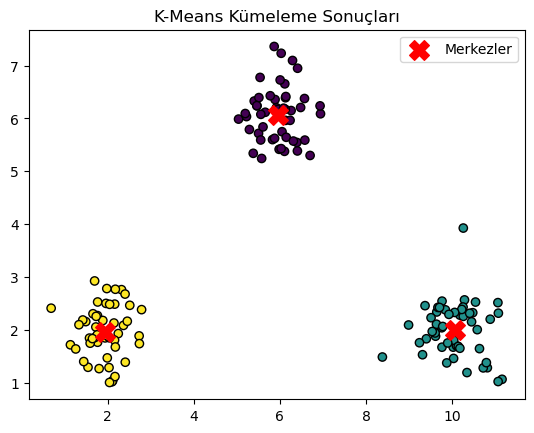

In [5]:
# Örnek veri oluşturma
np.random.seed(42)
X = np.vstack([
    np.random.normal(loc=[2, 2], scale=0.5, size=(50, 2)),
    np.random.normal(loc=[6, 6], scale=0.5, size=(50, 2)),
    np.random.normal(loc=[10, 2], scale=0.5, size=(50, 2))
])

# Kümeleme işlemi
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Davies-Bouldin indeksini hesaplama
db_index = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin İndeksi: {db_index:.4f}")

# Kümeleme sonuçlarını görselleştirme
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label="Merkezler")
plt.title("K-Means Kümeleme Sonuçları")
plt.legend()
plt.show()

# **Özellik Ölçekleme (Feature Scaling)**
Makine öğrenmesi algoritmaları, özellikle mesafeye dayalı ve gradyan iniş kullanan modeller, verilerin farklı ölçeklerde olmasından olumsuz etkilenebilir. **Özellik ölçekleme**, değişkenlerin belirli bir aralığa getirilmesini sağlayarak modellerin daha dengeli ve doğru sonuçlar vermesine yardımcı olur.

---

## **Özellik Ölçekleme Neden Gereklidir?**
- **Algoritmaların Performansını Artırır**: KNN, K-Means, PCA gibi algoritmalarda ölçekleme büyük önem taşır.
- **Gradyan İniş Optimizasyonunu İyileştirir**: Yapay sinir ağları ve lojistik regresyon gibi modeller daha stabil ve hızlı öğrenir.
- **Özniteliklerin Etkisini Dengeleyerek Daha Sağlıklı Kararlar Alır**: Farklı ölçeklerdeki özellikler arasındaki büyük farklar modelin ağırlıklandırmasını etkileyebilir.

---

## **Özellik Ölçekleme Yöntemleri**
### **1. Min-Max Scaling (Minimum-Maksimum Ölçekleme)**
Veriyi **belirli bir aralığa (genellikle 0-1)** dönüştüren normalizasyon yöntemidir.

**Formül:**
\[
X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}
\]

**Python uygulaması:**
```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

### **2. Standardization (Z-Score Normalization)**
Bu yöntem, verilerin ortalamasını 0, standart sapmasını 1 yaparak ölçekleme sağlar.
**Formül:**
\[
[ X_{scaled} = \frac{X - \mu}{\sigma} ]
\]
**Python uygulaması:**
```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

### **3. Robust Scaling (Sağlam Ölçekleme)**
Aykırı değerlere karşı daha dayanıklı bir ölçekleme yöntemidir. Medyan ve interkuartil aralığını (IQR) kullanır.
**Formül:**
\[
[ X_{scaled} = \frac{X - \text{medyan}}{\text{IQR}} ]
\]
```python
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(data)